In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report


In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\Desktop\ML_FINAL\4th\Admission_Predict_Ver1.1.csv")
df.head()  # Display the first few rows to understand the dataset structure


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Drop "Serial No." as it is an identifier and not useful for classification
df = df.drop('Serial No.', axis=1)


In [4]:
# Convert 'Chance of Admit ' to binary values where >0.75 is 1 (admitted), else 0 (not admitted)
df['Chance of Admit '] = [1 if each > 0.75 else 0 for each in df['Chance of Admit ']]


In [5]:
# Define features (X) and target variable (y)
# X includes relevant student information for predicting admission
# y is the binary outcome indicating admission status
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['Chance of Admit ']


In [6]:
# Split the data into training and testing sets
# Training set: 75% of data, used to train the model
# Testing set: 25% of data, used to evaluate the model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [7]:
# Initialize the Decision Tree Classifier model
# The model learns patterns in the training data to make predictions on new data
model_dt = DecisionTreeClassifier(random_state=1)

# Train the model on the training data
# This step uses the training data (x_train, y_train) to build the decision tree
model_dt.fit(x_train, y_train)


DecisionTreeClassifier(random_state=1)

In [8]:
# Make predictions on the test data
# The model applies learned patterns to predict admission status for x_test
y_pred_dt = model_dt.predict(x_test)


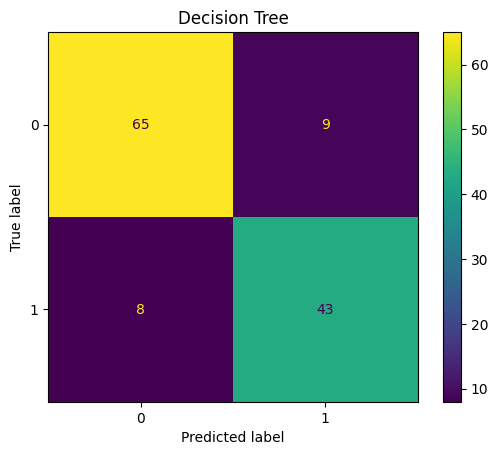

In [9]:
# Display Confusion Matrix
# The Confusion Matrix shows true vs predicted values for each class (admitted, not admitted)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.title('Decision Tree')
plt.show()
